In [1]:
# analysis of 2D meshplots of O-A for single-cycle varBC experiment
# initial built: 2024/07/19

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
print(cartopy.__version__)

0.21.1


In [96]:
#root_dir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/single_cycle_VarBC_experiment/cnvstats/'
root_dir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/old_crtm_VarBC_experiment/cnvstats/'

obs_var = 't'
obs_var_long_name = 'Humidity'
exps = ['bc0_inf','bc0_noinf','bc1_inf','bc1_noinf']

In [97]:
lat={}; lon={}; pres={};
qc={}; ause={}; omfadj={};

for exp in exps:
    fn = f'{root_dir}/{exp}/diag_conv_{obs_var}_ges.2022070100.nc4'
    fnc = nc.Dataset(fn)
    qc[exp]     = fnc.variables['Prep_QC_Mark'][:]       
    lon[exp]    = fnc.variables['Longitude'][:]
    lat[exp]    = fnc.variables['Latitude'][:]
    pres[exp]   = fnc.variables['Pressure'][:]   
    ause[exp]   = fnc.variables['Analysis_Use_Flag'][:]
    omfadj[exp] = fnc.variables['Obs_Minus_Forecast_adjusted'][:]
    
# select data
select  = (qc['bc0_inf'] <= 4) 

lons={}; lats={}; ps={}; omfs={};
for exp in exps:
    lons[exp] = lon[exp][select]
    lats[exp] = lat[exp][select]
    ps[exp]   = pres[exp][select]
    omfs[exp] = omfadj[exp][select]

In [98]:
# vertical averaged grid definitions

if obs_var in ('q','t'):
    #ptop=np.array([1000., 900.,800.,600.,400.,300.,250.,200.,150.,100., 50.,30.,20.,10., 5.,0.])
    #pbot=np.array([1200.,1000.,900.,800.,600.,400.,300.,250.,200.,150.,100.,50.,30.,20.,10.,5.])
    ptop=np.array([1000., 900.,800.,700.,600.,500.,400.,300.,200.,150.,100., 50.,30.,20.,10., 5.,0.])
    pbot=np.array([1200.,1000.,900.,800.,700.,600.,500.,400.,300.,200.,150.,100.,50.,30.,20.,10.,5.])
    #ptop=np.array([1000., 950.,900.,850.,800.,750.,700.,650.,600.,500.,400.,300.,200.,150.,100., 50.,30.,20.,10., 5.,0.])
    #pbot=np.array([1200.,1000.,950.,900.,850.,800.,750.,700.,650.,600.,500.,400.,300.,200.,150.,100.,50.,30.,20.,10.,5.])
#elif obs_var == 'q':
#    ptop=np.array([1000., 950.,900.,850.,800.,700.,600.,500.,400.,300.,200.,100.])
#    pbot=np.array([1200.,1000.,950.,900.,850.,800.,700.,600.,500.,400.,300.,200.])    
elif obs_var == 'gps':
    ptop=np.array([1000., 900.,800.,600.,400.,300.,250.,200.,150.,100., 50.,30.,20.,10., 7.,5.,3.,2.,1.,0.])
    pbot=np.array([1200.,1000.,900.,800.,600.,400.,300.,250.,200.,150.,100.,50.,30.,20.,10.,7.,5.,3.,2.,1.])

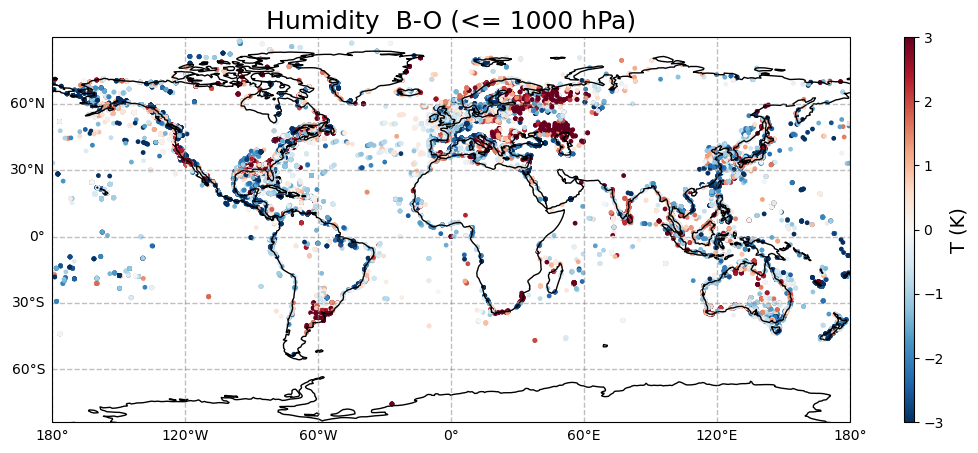

In [99]:
# 2D-meshplot of B-O at the lowest level (should be the same for all experiments):
exptest = 'bc0_inf'

plot_lev   = 0
select_lev = (ps[exptest] <= pbot[plot_lev])&(ps[exptest] > ptop[plot_lev]) 

lon_lev = lons[exptest][select_lev]
lat_lev = lats[exptest][select_lev]
omf_lev = omfs[exptest][select_lev]


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(14,5))
ax.coastlines()
if obs_var == 't':
    scatter1=ax.scatter(lon_lev, lat_lev, c=-omf_lev, s=6, vmin=-3, vmax=3,cmap='RdBu_r')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('T (K)', fontsize=14)
elif obs_var == 'q':
    scatter1=ax.scatter(lon_lev, lat_lev, c=-omf_lev*1e3, s=6, vmin=-4, vmax=4,cmap='RdBu_r')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('q (g/kg)', fontsize=14)
    
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'{obs_var_long_name}  B-O (<= 1000 hPa)', fontsize=18)

plt.savefig(f'bmo_surf_{obs_var}.png', dpi=200, bbox_inches='tight')

In [100]:
# read analysis data:

lata={}; lona={}; presa={};
qca={}; ausea={}; omfadja={}; # a = analysis

for exp in exps:
    fn = f'{root_dir}/{exp}/diag_conv_{obs_var}_anl.2022070100.nc4'
    fnc = nc.Dataset(fn)
    qca[exp]     = fnc.variables['Prep_QC_Mark'][:]       
    lona[exp]    = fnc.variables['Longitude'][:]
    lata[exp]    = fnc.variables['Latitude'][:]
    presa[exp]   = fnc.variables['Pressure'][:]   
    ausea[exp]   = fnc.variables['Analysis_Use_Flag'][:]
    omfadja[exp] = fnc.variables['Obs_Minus_Forecast_adjusted'][:]

# select data
select  = (qca['bc0_inf'] <= 4) 

lonsa={}; latsa={}; psa={}; omfsa={};
for exp in exps:
    lonsa[exp] = lona[exp][select]
    latsa[exp] = lata[exp][select]
    psa[exp]   = presa[exp][select]
    omfsa[exp] = omfadja[exp][select]

In [107]:
# 2D-meshplot of Ai-Aj at the lowest level (plot param)
exptest = 'bc1_noinf'
expref  = 'bc0_noinf'

plot_lev   = 0
select_lev = (psa[exptest] <= pbot[plot_lev])&(psa[exptest] > ptop[plot_lev]) 

lon_lev = lonsa[exptest][select_lev]
lat_lev = latsa[exptest][select_lev]
omf_lev = omfsa[expref][select_lev] - omfsa[exptest][select_lev]

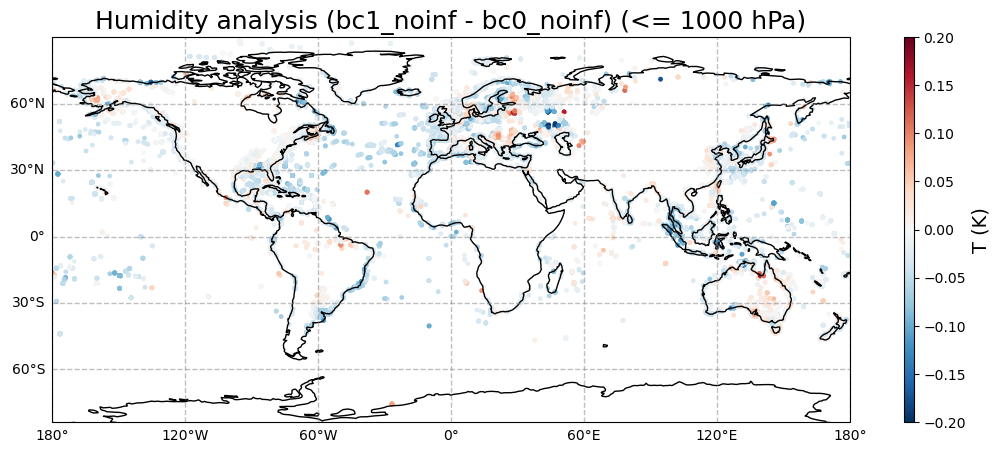

In [108]:
# 2D-meshplot of Ai-Aj at the lowest level (plot)


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(14,5))
ax.coastlines()
if obs_var == 't':
    scatter1=ax.scatter(lon_lev, lat_lev, c=omf_lev, s=6, vmin=-0.2, vmax=0.2,cmap='RdBu_r')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('T (K)', fontsize=14)
elif obs_var == 'q':
    scatter1=ax.scatter(lon_lev, lat_lev, c=omf_lev*1e3, s=6, vmin=-0.4, vmax=0.4,cmap='RdBu_r')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('q (g/kg)', fontsize=14)
    
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'{obs_var_long_name} analysis ({exptest} - {expref}) (<= 1000 hPa)', fontsize=18)

plt.savefig(f'analysis_diff_surf_{obs_var}_{exptest}_minus_{expref}.png', dpi=200, bbox_inches='tight')